# Flight Price Prediction

**Here I have taken a Flight dataset and created a model to predict the prices of upcoming flights.**

In [1]:
# Importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Importing Dataset
df=pd.read_excel('Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Handling missing values 

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
#Since we have a lot of data so we are dropping those 2 rows.
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now the data doesn't have any missing value.

## Handling Time-Series Data

In [9]:
# We are extracting Journey day, month and day of week from the date of journey.

df['Journey_day']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day
df['Journey_month']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.month
df['Journey_day_of_week']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.weekday

# Since we only have data of the year 2019, So we will not extract the year from the date.

In [10]:
# Since we have collected all the information from the date, So we will drop it now.
df.drop('Date_of_Journey',axis=1,inplace=True)

In [11]:
# Similarly we will collect the departure hour and minute from the departure time.
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

# Similarly we will now drop 'Dep_Time' column.
df.drop('Dep_Time',axis=1,inplace=True)

In [14]:
# Here we are taking eack element of 'Duration' column and converting it to a floting number as hours. 
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())==2:
        # When Duration consists of both hour and minute, we are splitting it by 'h' and 'm'.
        # Then extracting the hour and minute numerically and joining them with a point(.)
        duration[i]=float('.'.join((duration[i].split(sep='h')[0],duration[i].split(sep='m')[0].split()[-1])))
    else:
        if 'h' in duration[i]:
            # If there is only hour data, then we split the wrt 'h' and take the number.
            duration[i]=float(duration[i].split(sep='h')[0])
        else:
            # Similarly for minute.
            duration[i]=float('.'.join(('0',duration[i].split(sep='m')[0])))
df['Duration']=duration   

In [15]:
# We can get Arrival_Time from Dep_hour,Dep_min and Duration.
# Then Arrival_Time is not independent,So we will drop it.
df.drop('Arrival_Time',axis=1,inplace=True)

In [16]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_day_of_week,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2.50,non-stop,No info,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.25,2 stops,No info,7662,1,5,2,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19.00,2 stops,No info,13882,9,6,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.25,1 stop,No info,6218,12,5,6,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4.45,1 stop,No info,13302,1,3,4,16,50


## Handling Categorical Data

In [17]:
# Approx 80% of the data don't have any info in the additional info section.
# So we will now drop additional info column
 
df.drop('Additional_Info',axis=1,inplace=True)

In [18]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [19]:
# Converting Categorical thing into numerical thing.
df['Total_Stops'].replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4},inplace=True)

In [20]:
# Since we have the data of total no of stops, so we don't need the route data that much
# So we will now remove 'Route' column
df.drop('Route',axis=1,inplace=True)

## EDA 

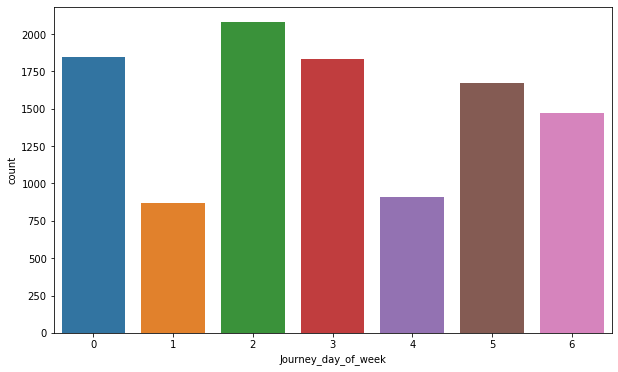

In [21]:
# Which day has the most number of flights?
plt.figure(figsize=(10,6))
sns.countplot('Journey_day_of_week',data=df);

Here **'2'** represents **wednesday**. Clearly most number of flights are on **wednesday**.

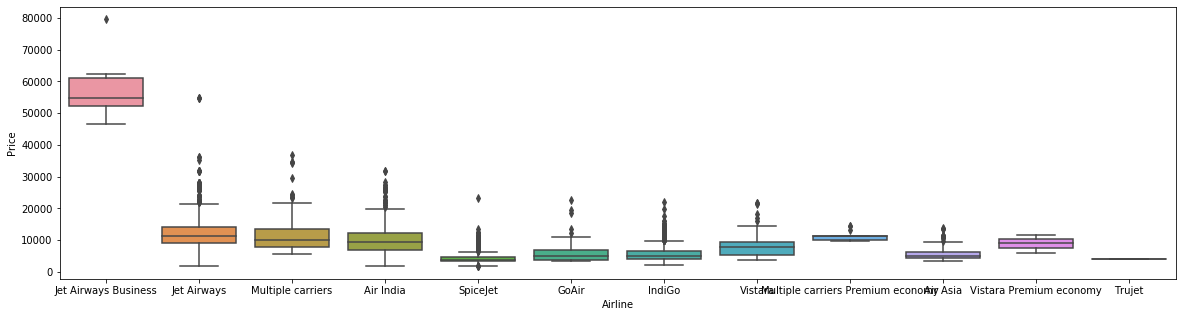

In [22]:
# Airline vs Price
plt.figure(figsize=(20,5))
sns.boxplot('Airline','Price',data=df.sort_values('Price',ascending=False));

**Jet Airways Business** flights has higher fare range than others.

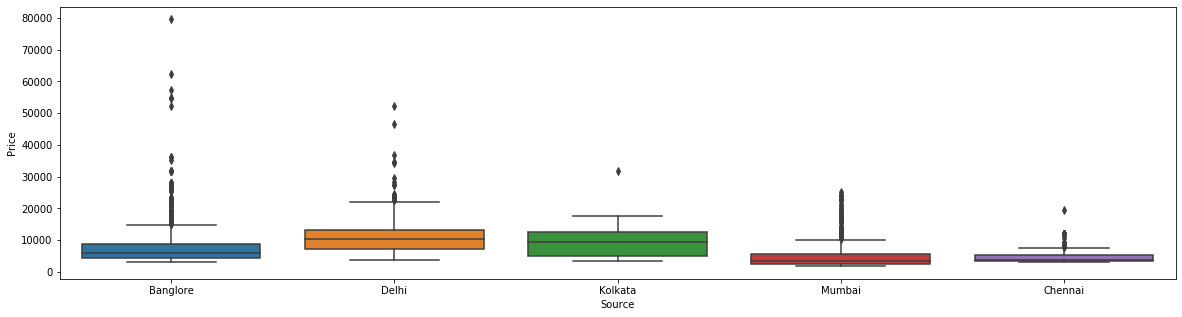

In [23]:
# Source vs Price
plt.figure(figsize=(20,5))
sns.boxplot('Source','Price',data=df.sort_values('Price',ascending=False));

**Source** of the flights doesn't make any difference in price. It's pretty same for all sources.

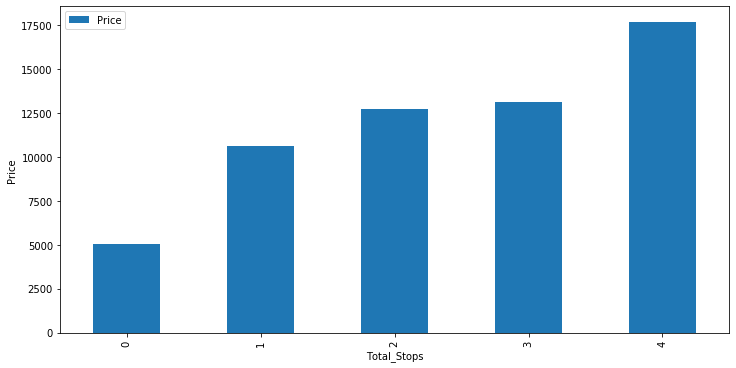

In [24]:
# Total_Stops vs Price
df[['Total_Stops','Price']].groupby('Total_Stops').mean().plot.bar(figsize=(12,6))
plt.ylabel('Price');

So if the number of **Total_Stops** increases then **Price** also increases.

# One Hot Encoding

In [25]:
# Since Airline is a nomial data, so we will use One-Hot Encoding.
# Otherwise we would have used Label Encoding.
Airline_data=df[['Airline']]
Airline_data=pd.get_dummies(Airline_data,drop_first=True)
Airline_data.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [26]:
# Since Source is also a nomial data, so we will use One-Hot Encoding.
Source=df[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [27]:
# Since Destination is also a nomial data, so we will use One-Hot Encoding.
Destination=df[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [28]:
# Now we will add these columns and drop previous categorical column.

df=pd.concat([df,Airline_data,Source,Destination],axis=1)

df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [29]:
df.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_day_of_week,Dep_hour,Dep_min,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2.50,0,3897,24,3,6,22,20,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7.25,2,7662,1,5,2,5,50,1,0,...,0,0,0,1,0,0,0,0,0,0
2,19.00,2,13882,9,6,6,9,25,0,0,...,0,0,1,0,0,1,0,0,0,0
3,5.25,1,6218,12,5,6,18,5,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4.45,1,13302,1,3,4,16,50,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
# Here 'X' is the data of independent variables and
# 'y' is the dependent variable

X=df.drop('Price',axis=1)
y=df['Price']

# Fitting the model

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
y_pred=rf_reg.predict(X_test)

In [34]:
rf_reg.score(X_train,y_train)

0.9527677959082647

In [35]:
rf_reg.score(X_test,y_test)

0.7997980038160578

In [36]:
from sklearn import metrics

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1235.8678245726871
MSE: 4316766.717927784
RMSE: 2077.68301671063


In [38]:
metrics.r2_score(y_test, y_pred)

0.7997980038160578

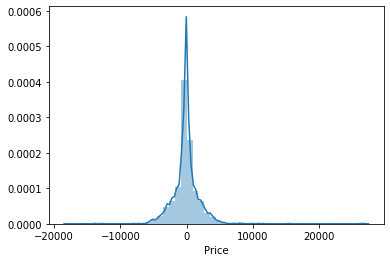

In [39]:
sns.distplot(y_test-y_pred)
plt.show()

# Hyperparameter Tuning

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5,7,10]

In [62]:
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [63]:
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid,
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [64]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 7, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [65]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 25}

In [56]:
y_pred1 = rf_random.predict(X_test)

In [67]:
rf_reg_final=RandomForestRegressor(n_estimators=1100,
                             min_samples_split= 10,
                             min_samples_leaf= 2,
                            max_depth= 25)
rf_reg_final.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=1100)

In [68]:
rf_reg_final.score(X_test,y_test)

0.8043025249362318

In [69]:
y_pred1 = rf_reg_final.predict(X_test)

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1187.9150428025293
MSE: 4219639.979821216
RMSE: 2054.176229007924


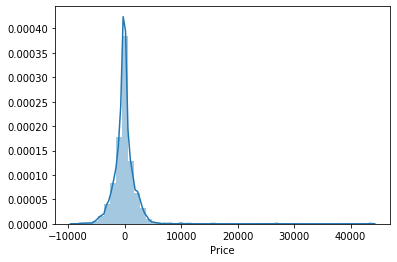

In [71]:
sns.distplot(y_test-y_pred1)
plt.show()

# Thank You